# Parkison's Disease

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the dataset

In [3]:
df = pd.read_csv("Ensemble.csv")

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). 


Attribute Information:

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

#### The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

In [5]:
df.shape

(195, 24)

This dataset contains 195 rows and 24 columns

In [6]:
#df.column to print each columns of dataset
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

These are several columns which our datset contains.

In [7]:
#df.rename to rename column names
df.rename(columns = {'name':'Name','MDVP:Fo(Hz)':'AVG','MDVP:Fhi(Hz)':'MAX','MDVP:Flo(Hz)':'MIN', 'MDVP:Jitter(%)':'Jitter_Percentage','MDVP:Jitter(Abs)':'ABS','MDVP:RAP':'RAP','MDVP:PPQ':'PPQ','Jitter:DDP':'DDP','MDVP:Shimmer':'Shimmer','MDVP:Shimmer(dB)':'dB','Shimmer:APQ3':'APQ3','Shimmer:APQ5':'APQ5','MDVP:APQ':'APQ','Shimmer:DDA':'DDA' }, inplace = True)

Change columns name with some appropriate names

In [8]:
df.columns

Index(['Name', 'AVG', 'MAX', 'MIN', 'Jitter_Percentage', 'ABS', 'RAP', 'PPQ',
       'DDP', 'Shimmer', 'dB', 'APQ3', 'APQ5', 'APQ', 'DDA', 'NHR', 'HNR',
       'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

New columns names

In [9]:
#The describe() method returns description of the data in the DataFrame
df.describe()

,AVG,MAX,MIN,Jitter_Percentage,ABS,RAP,PPQ,DDP,Shimmer,dB,...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Minimum and Maximum values of 'AVG' is respectively 88.333000,260.105000 

Minimum and Maximum values of 'MAX' is respectively 102.145000,592.030000 

Minimum and Maximum values of 'MIN' is respectively 65.476000,239.170000 

Minimum and Maximum values of 'Jitter_Percentage' is respectively 0.001680,0.033160 

Minimum and Maximum values of 'ABS' is respectively 0.000035,0.000260 

Minimum and Maximum values of 'RAP' is respectively 0.000680,0.021440 

Minimum and Maximum values of 'PPQ' is respectively 0.000920,0.019580 

Minimum and Maximum values of 'DDP' is respectively 0.002040,0.064330 

Minimum and Maximum values of 'Shimmer' is respectively 0.009540,0.119080 

Minimum and Maximum values of 'dB' is respectively 0.085000,1.302000 

Minimum and Maximum values of 'DDA' is respectively 0.013640,0.169420 

Minimum and Maximum values of 'NHR' is respectively 0.000650,0.314820 

Minimum and Maximum values of 'HNR' is respectively 8.441000,33.047000 

Minimum and Maximum values of 'RPDE' is respectively 0.256570,0.685151 

Minimum and Maximum values of 'DFA' is respectively 0.574282,0.825288 

Minimum and Maximum values of 'spread1' is respectively -7.964984,-2.434031 

Minimum and Maximum values of 'spread2' is respectively 0.006274,0.450493 

Minimum and Maximum values of 'D2' is respectively 1.423287,3.671155 

Minimum and Maximum values of 'PPE' is respectively 0.044539,0.527367 

In [10]:
#The info() method prints information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               195 non-null    object 
 1   AVG                195 non-null    float64
 2   MAX                195 non-null    float64
 3   MIN                195 non-null    float64
 4   Jitter_Percentage  195 non-null    float64
 5   ABS                195 non-null    float64
 6   RAP                195 non-null    float64
 7   PPQ                195 non-null    float64
 8   DDP                195 non-null    float64
 9   Shimmer            195 non-null    float64
 10  dB                 195 non-null    float64
 11  APQ3               195 non-null    float64
 12  APQ5               195 non-null    float64
 13  APQ                195 non-null    float64
 14  DDA                195 non-null    float64
 15  NHR                195 non-null    float64
 16  HNR                195 non

dataset has int,float and object values

In [11]:
#isnull().count() is use to count null values in dataframe
df.isnull().count()

Name                 195
AVG                  195
MAX                  195
MIN                  195
Jitter_Percentage    195
ABS                  195
RAP                  195
PPQ                  195
DDP                  195
Shimmer              195
dB                   195
APQ3                 195
APQ5                 195
APQ                  195
DDA                  195
NHR                  195
HNR                  195
status               195
RPDE                 195
DFA                  195
spread1              195
spread2              195
D2                   195
PPE                  195
dtype: int64

There are no any null values in this dataframe.

<Axes: xlabel='status', ylabel='count'>

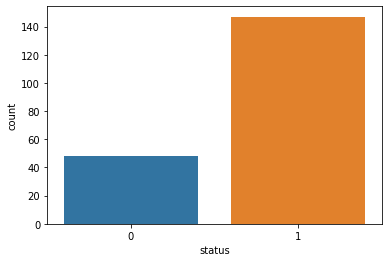

In [12]:
#Countplot Show the counts of observations in each categorical bin using bars. 
sns.countplot(x=df["status"])

Status : Health status of the subject 

1 - Parkinson's

0 - healthy

Observation :
    
In more that 140 pateints Parkinson founded positive. 

Less than 50 patients founded healthy.

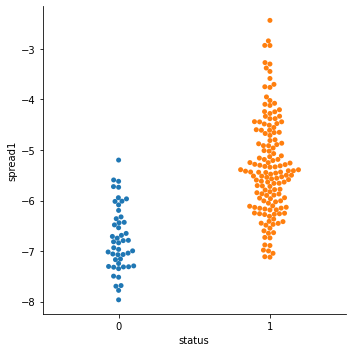

In [13]:
#catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.
sns.catplot(x="status", y="spread1",kind="swarm", data=df)

Observation :
    
The range of spread1 for Healthy people is 0 to -5

The range of spread1 for Parkinson's pateints is -7 to -1

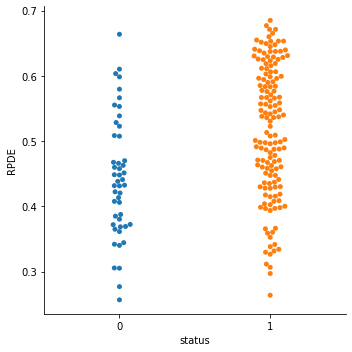

In [14]:
#catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.
sns.catplot(x="status", y="RPDE",kind="swarm", data=df)

Observation :
    
There are no any major changes founded in the value of RPDE between health people and parkinson's pateints.  

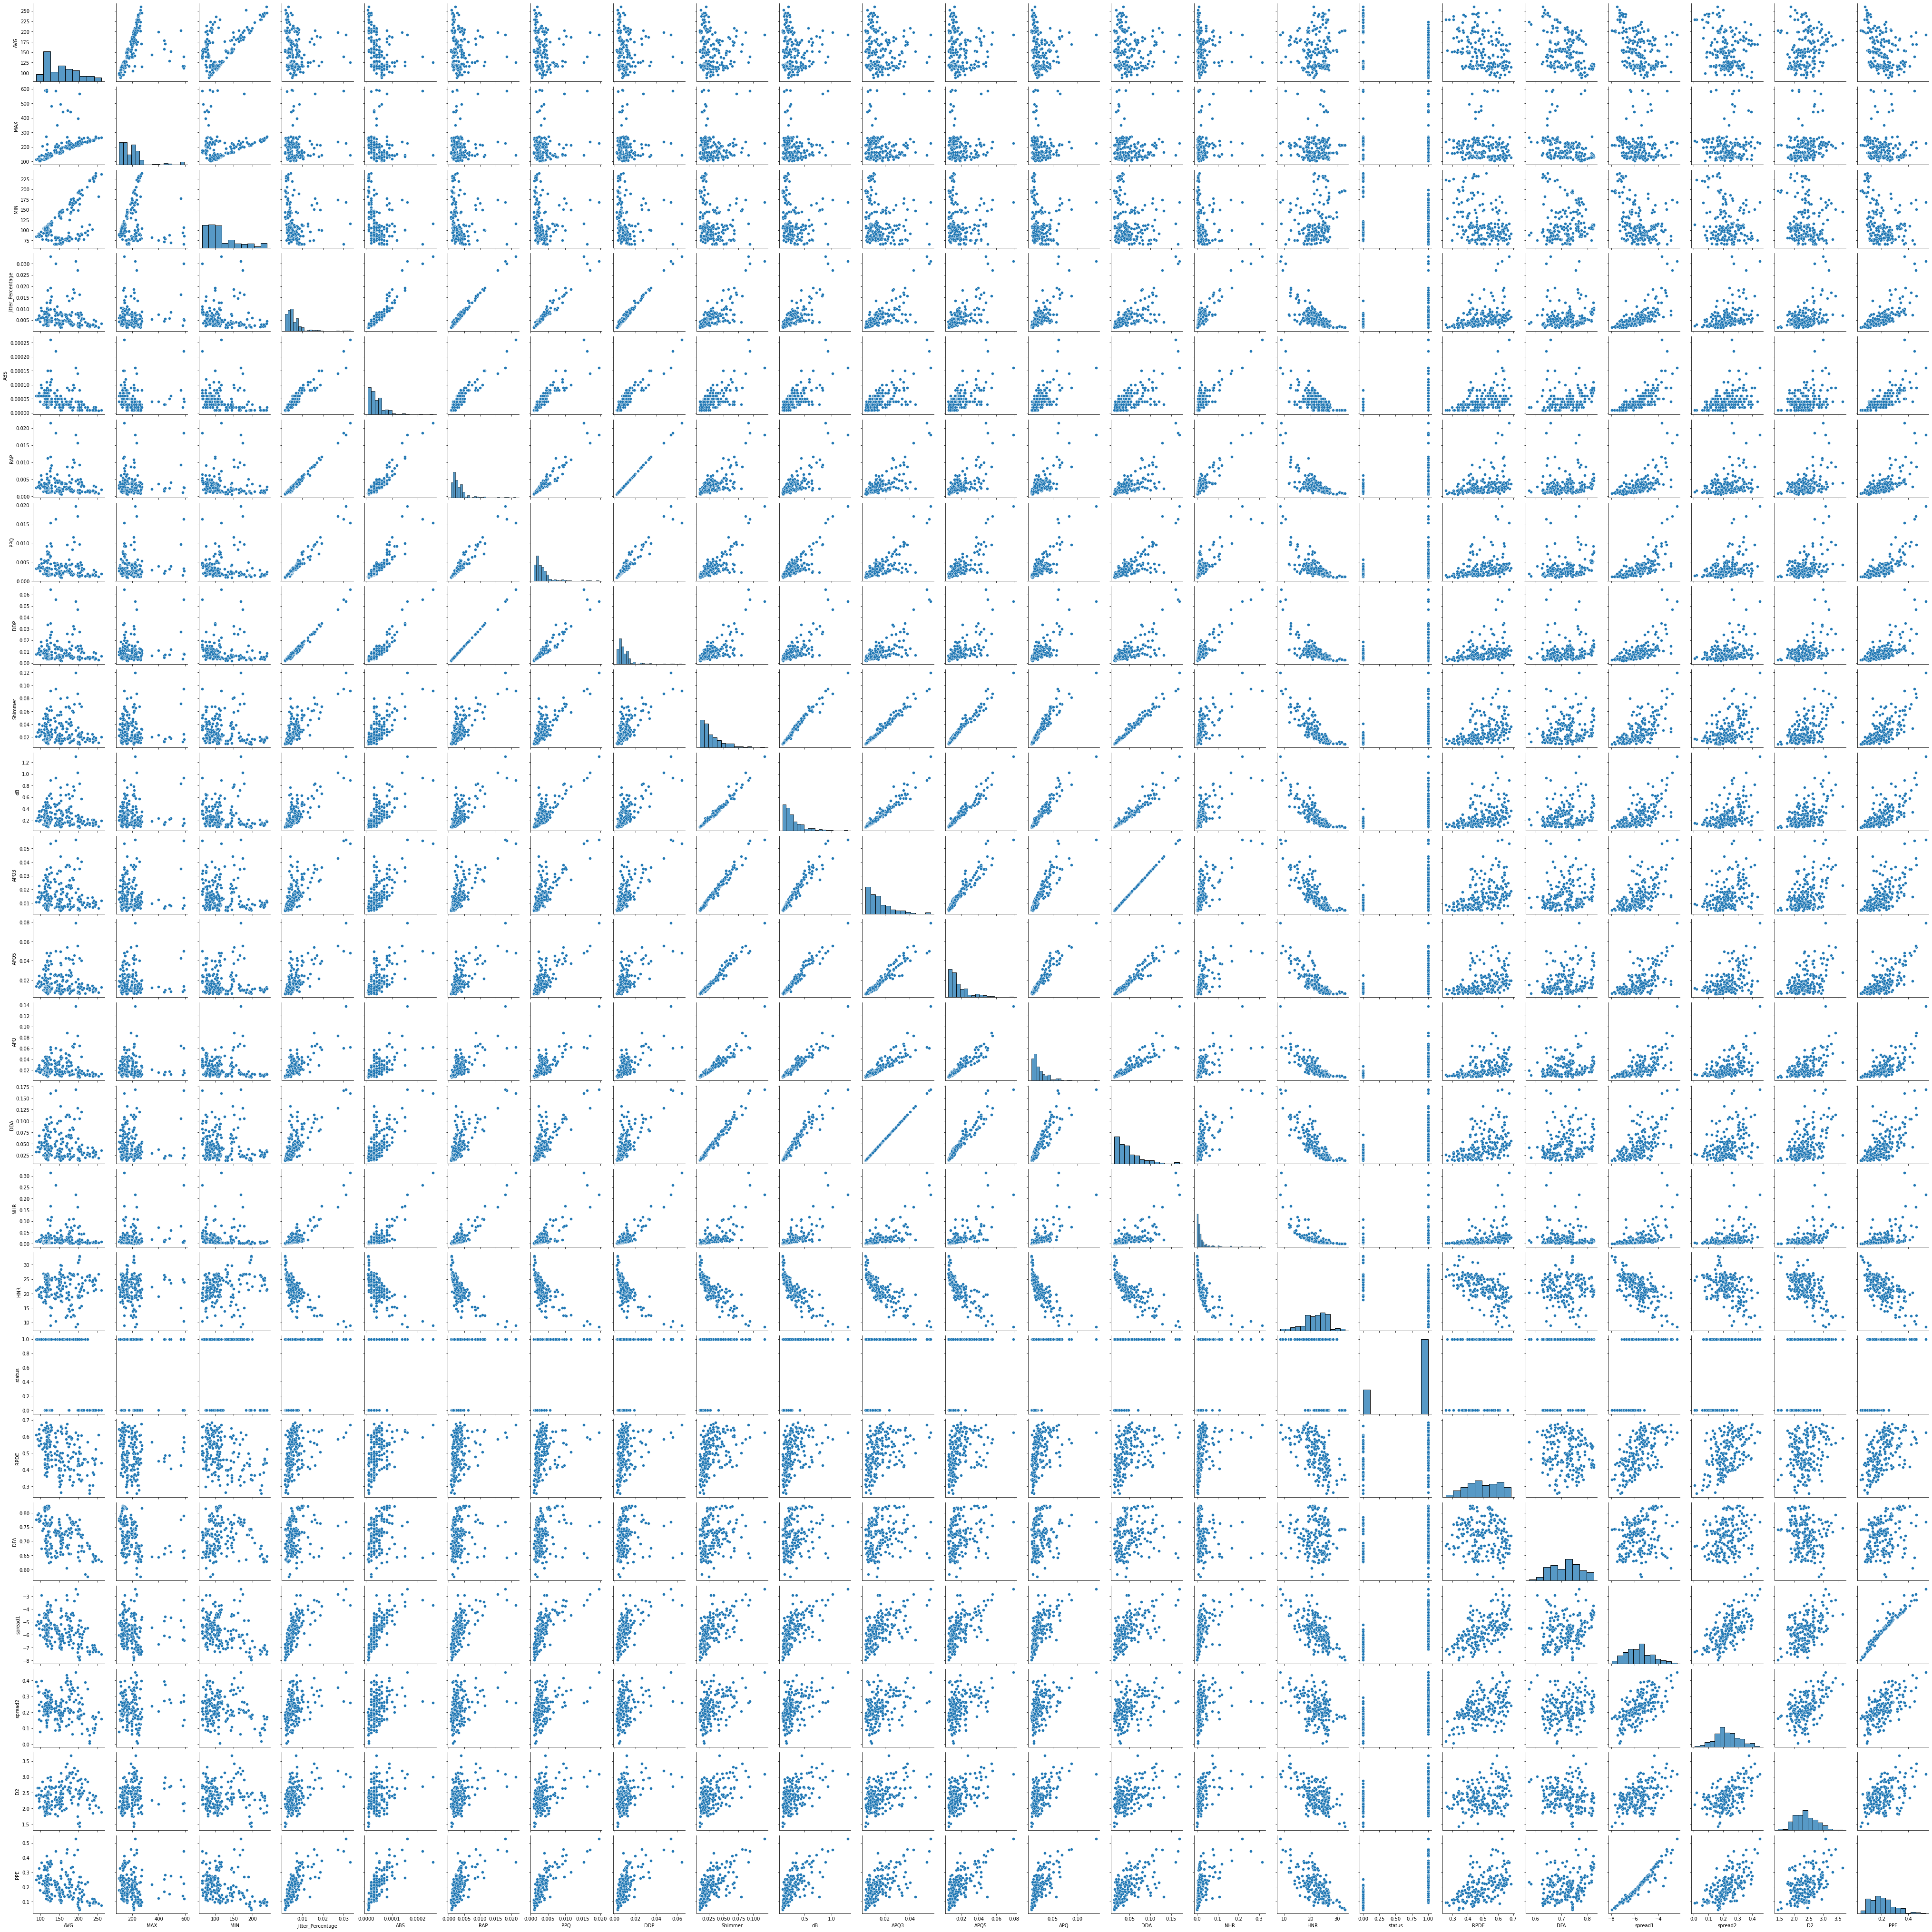

In [15]:
#The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. 
sns.pairplot(data=df)

Pairplots shows all the corelations of dependent and independent variables

Whether they are lineraly corelated or not

Observation :
    
Linearly high corelated columns 

    DDP - RAP 
    DDA - APQ3
    RAP - Jitter_Percentage
    PPQ - Jitter_Percentage
    DDP - Jitter_Percentage
    RAP - PPQ
    PPQ - DAP
    dC  - Shimmer
    APQ3 - Shimmer
    APQ5 - Shimmer
    APQ  - Shimmer
    

<Axes: >

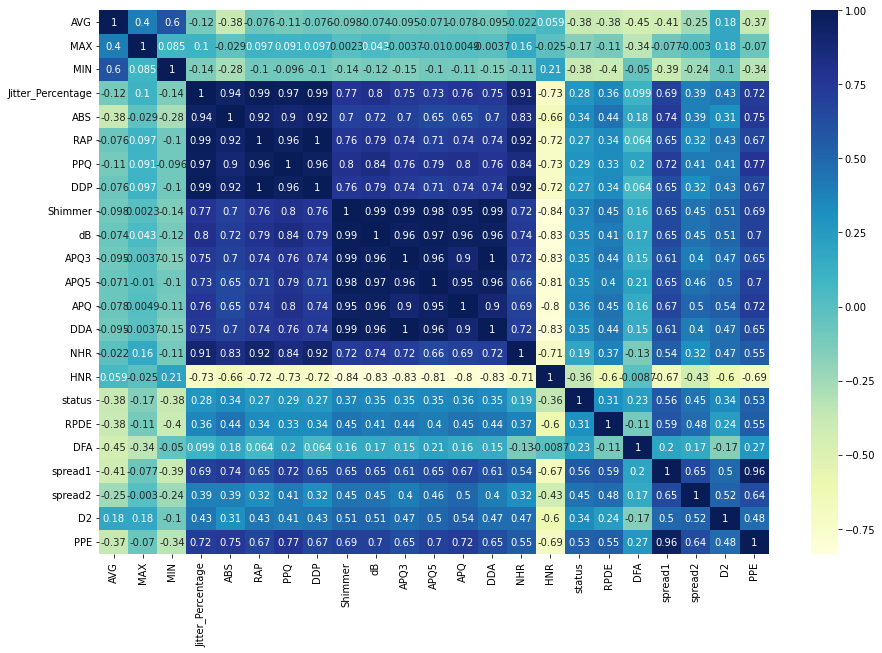

In [16]:
#A heat map represents these coefficients to visualize the strength of correlation among variables
df2 = df.drop(['Name'], axis=1,inplace=False)
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),cmap="YlGnBu", annot=True)

Observation :
    
APQ3 and DDA is correlated to each other.

RAP and DDP is correlated to each other.

<Axes: xlabel='APQ3', ylabel='DDA'>

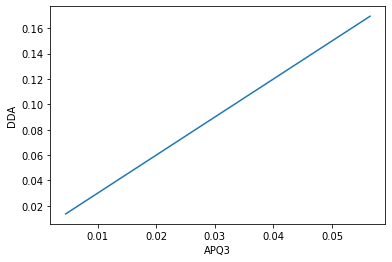

In [57]:
#Lineplot() function to represent the multi data variable relationships with a varying size of line to be plotted.
sns.lineplot(x="APQ3", y="DDA", data=df)

Observation :
    
The value of DDA is increased as the value of APQ3 increased.

<Axes: xlabel='RAP', ylabel='DDP'>

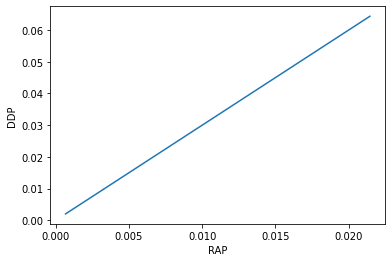

In [18]:
sns.lineplot(x="RAP", y="DDP", data=df)

Observation :
    
The value of DDP is increased as the value of RAP increased.

In [44]:
df_final = df.drop(columns=['DDP','DDA'])

Drop DDP and DDA columns because they are correlated to other columns.

In [45]:
X=df_final.drop(columns=['Name','status'])
y=df_final['status']

Take status column as target column

And other columns as training column

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)

Divide the dataset in training and testing data :
    
Use 30% of data as testing data

Use 70% of data as training data

In [47]:
X

,AVG,MAX,MIN,Jitter_Percentage,ABS,RAP,PPQ,Shimmer,dB,APQ3,APQ5,APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.04374,0.426,0.02182,0.03130,0.02971,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.06134,0.626,0.03134,0.04518,0.04368,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.05233,0.482,0.02757,0.03858,0.03590,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.05492,0.517,0.02924,0.04005,0.03772,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.06425,0.584,0.03490,0.04825,0.04465,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.04087,0.405,0.02336,0.02498,0.02745,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.02751,0.263,0.01604,0.01657,0.01879,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.02308,0.256,0.01268,0.01365,0.01667,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.02296,0.241,0.01265,0.01321,0.01588,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [49]:
X.columns

Index(['AVG', 'MAX', 'MIN', 'Jitter_Percentage', 'ABS', 'RAP', 'PPQ',
       'Shimmer', 'dB', 'APQ3', 'APQ5', 'APQ', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [58]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

In [52]:
#use entropy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Entropy determines how a decision tree chooses to split data.

In [53]:
#Find accuracy on X_test,y_test 
accuracy = clf.score(X_test,y_test)

In [54]:
print('Accuracy',accuracy)

Accuracy 0.8983050847457628


### Observation :
    
Accuracy = 89%

Model tunned the accuracy around 89%.

### Why Decision Tree ?

Decision tree has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
It will create better tree structure in our dataset and predict the correct decision.

### Model Validation

In [55]:
y_pred = clf.predict([[116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.05233,0.482,0.02757,0.03858,0.0359,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634]])

Predicted a values 

In [56]:
y_pred

array([1])

It means our model predict that patient may have Parkison's Disease